Importing Necessary Libraries

In [60]:
import pandas as pd
import numpy as np

File Import and Variable Setting

In [61]:
base_path = r"C:\Users\Admin\Desktop\Python\Python Mpba\Group Project\Travel Master"
cvw = pd.read_csv(f'{base_path}\\Country Wise Visitors Ways.csv')
cyv = pd.read_csv(f'{base_path}\\Country Wise Yearly VIsitors.csv')

In [62]:
cvw.head()

,Country of Nationality,2014 AIR,2014 SEA,2014 RAIL,2014 LAND,2015 AIR,2015 SEA,2015 RAIL,2015 LAND,2016 AIR,...,2018 RAIL,2018 LAND,2019 AIR,2019 SEA,2019 RAIL,2019 LAND,2020 AIR,2020 SEA,2020 RAIL,2020 LAND
0,Canada,99.2,0.1,0.0,0.7,99.0,0.5,0.0,0.5,99.1,...,0.0,0.5,98.10,1.22,0.01,0.67,98.1,1.0,0.0,0.9
1,United States Of America,99.5,0.1,0.0,0.4,99.3,0.5,0.0,0.2,99.5,...,0.0,0.3,98.97,0.68,0.01,0.34,99.1,0.5,0.0,0.4
2,Argentina,97.9,0.0,0.0,2.1,97.7,0.4,0.0,1.9,98.5,...,0.0,1.5,96.61,1.54,0.02,1.83,97.3,1.5,0.0,1.2
3,Brazil,98.7,0.2,0.0,1.1,99.3,0.4,0.0,0.3,99.0,...,0.0,0.6,96.93,2.33,0.00,0.74,97.1,2.4,0.0,0.5
4,Mexico,99.1,0.2,0.0,0.7,98.0,1.6,0.0,0.4,96.4,...,0.0,0.4,95.82,3.89,0.00,0.29,96.7,2.8,0.0,0.4


Finding Out Null Values

In [63]:
cvw.isnull().sum()

Country of Nationality    0
2014 AIR                  0
2014 SEA                  0
2014 RAIL                 0
2014 LAND                 0
2015 AIR                  0
2015 SEA                  0
2015 RAIL                 0
2015 LAND                 0
2016 AIR                  0
2016 SEA                  0
2016 RAIL                 0
2016 LAND                 0
2017 AIR                  0
2017 SEA                  0
2017 RAIL                 0
2017 LAND                 0
2018 AIR                  0
2018 SEA                  0
2018 RAIL                 0
2018 LAND                 0
2019 AIR                  0
2019 SEA                  0
2019 RAIL                 0
2019 LAND                 0
2020 AIR                  0
2020 SEA                  0
2020 RAIL                 0
2020 LAND                 0
dtype: int64

Checking Data Types

In [64]:
cvw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Nationality  63 non-null     object 
 1   2014 AIR                63 non-null     float64
 2   2014 SEA                63 non-null     float64
 3   2014 RAIL               63 non-null     float64
 4   2014 LAND               63 non-null     float64
 5   2015 AIR                63 non-null     float64
 6   2015 SEA                63 non-null     float64
 7   2015 RAIL               63 non-null     float64
 8   2015 LAND               63 non-null     float64
 9   2016 AIR                63 non-null     float64
 10  2016 SEA                63 non-null     float64
 11  2016 RAIL               63 non-null     float64
 12  2016 LAND               63 non-null     float64
 13  2017 AIR                63 non-null     object 
 14  2017 SEA                63 non-null     floa

Finding Non Numeric Columns and correcting for analysis

In [65]:
non_numeric_cols = cvw.columns[~cvw.apply(lambda col: pd.api.types.is_numeric_dtype(col))]

print("Non-numeric columns:", list(non_numeric_cols))
cvw['2017 AIR'] = pd.to_numeric(cvw['2017 AIR'], errors='coerce')

Non-numeric columns: ['Country of Nationality', '2017 AIR']


In [66]:
cvw.columns = [
    col if col == 'Country of Nationality' else f"{col}_ways" 
    for col in cvw.columns
]
cvw.head()

,Country of Nationality,2014 AIR_ways,2014 SEA_ways,2014 RAIL_ways,2014 LAND_ways,2015 AIR_ways,2015 SEA_ways,2015 RAIL_ways,2015 LAND_ways,2016 AIR_ways,...,2018 RAIL_ways,2018 LAND_ways,2019 AIR_ways,2019 SEA_ways,2019 RAIL_ways,2019 LAND_ways,2020 AIR_ways,2020 SEA_ways,2020 RAIL_ways,2020 LAND_ways
0,Canada,99.2,0.1,0.0,0.7,99.0,0.5,0.0,0.5,99.1,...,0.0,0.5,98.10,1.22,0.01,0.67,98.1,1.0,0.0,0.9
1,United States Of America,99.5,0.1,0.0,0.4,99.3,0.5,0.0,0.2,99.5,...,0.0,0.3,98.97,0.68,0.01,0.34,99.1,0.5,0.0,0.4
2,Argentina,97.9,0.0,0.0,2.1,97.7,0.4,0.0,1.9,98.5,...,0.0,1.5,96.61,1.54,0.02,1.83,97.3,1.5,0.0,1.2
3,Brazil,98.7,0.2,0.0,1.1,99.3,0.4,0.0,0.3,99.0,...,0.0,0.6,96.93,2.33,0.00,0.74,97.1,2.4,0.0,0.5
4,Mexico,99.1,0.2,0.0,0.7,98.0,1.6,0.0,0.4,96.4,...,0.0,0.4,95.82,3.89,0.00,0.29,96.7,2.8,0.0,0.4


Checking other table for merging- Country Year Vise Visitors

In [67]:
cyv.head()

,Country,2014,2015,2016,2017,2018,2019,2020
0,Canada,268485,281306,317239,335439,351040,351859,122868
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,Argentina,9731,9351,12308,14875,16345,12844,4294
3,Brazil,19563,20610,21289,24453,26579,25422,8092
4,Mexico,13978,14049,15689,18114,19909,20766,4580


Renamed columns for Tracking and joining Tables

In [68]:
cvw.rename(columns = {'Country of Nationality':'Country'},inplace = True)
cvw.head()

,Country,2014 AIR_ways,2014 SEA_ways,2014 RAIL_ways,2014 LAND_ways,2015 AIR_ways,2015 SEA_ways,2015 RAIL_ways,2015 LAND_ways,2016 AIR_ways,...,2018 RAIL_ways,2018 LAND_ways,2019 AIR_ways,2019 SEA_ways,2019 RAIL_ways,2019 LAND_ways,2020 AIR_ways,2020 SEA_ways,2020 RAIL_ways,2020 LAND_ways
0,Canada,99.2,0.1,0.0,0.7,99.0,0.5,0.0,0.5,99.1,...,0.0,0.5,98.10,1.22,0.01,0.67,98.1,1.0,0.0,0.9
1,United States Of America,99.5,0.1,0.0,0.4,99.3,0.5,0.0,0.2,99.5,...,0.0,0.3,98.97,0.68,0.01,0.34,99.1,0.5,0.0,0.4
2,Argentina,97.9,0.0,0.0,2.1,97.7,0.4,0.0,1.9,98.5,...,0.0,1.5,96.61,1.54,0.02,1.83,97.3,1.5,0.0,1.2
3,Brazil,98.7,0.2,0.0,1.1,99.3,0.4,0.0,0.3,99.0,...,0.0,0.6,96.93,2.33,0.00,0.74,97.1,2.4,0.0,0.5
4,Mexico,99.1,0.2,0.0,0.7,98.0,1.6,0.0,0.4,96.4,...,0.0,0.4,95.82,3.89,0.00,0.29,96.7,2.8,0.0,0.4


Making an Inner Join

In [69]:
cvw_updated = pd.merge(cvw, cyv, on='Country', how='inner')
cvw_updated.head()

,Country,2014 AIR_ways,2014 SEA_ways,2014 RAIL_ways,2014 LAND_ways,2015 AIR_ways,2015 SEA_ways,2015 RAIL_ways,2015 LAND_ways,2016 AIR_ways,...,2020 SEA_ways,2020 RAIL_ways,2020 LAND_ways,2014,2015,2016,2017,2018,2019,2020
0,Canada,99.2,0.1,0.0,0.7,99.0,0.5,0.0,0.5,99.1,...,1.0,0.0,0.9,268485,281306,317239,335439,351040,351859,122868
1,Argentina,97.9,0.0,0.0,2.1,97.7,0.4,0.0,1.9,98.5,...,1.5,0.0,1.2,9731,9351,12308,14875,16345,12844,4294
2,Brazil,98.7,0.2,0.0,1.1,99.3,0.4,0.0,0.3,99.0,...,2.4,0.0,0.5,19563,20610,21289,24453,26579,25422,8092
3,Mexico,99.1,0.2,0.0,0.7,98.0,1.6,0.0,0.4,96.4,...,2.8,0.0,0.4,13978,14049,15689,18114,19909,20766,4580
4,Austria,99.0,0.1,0.0,0.9,98.8,0.6,0.0,0.6,97.3,...,2.3,0.0,0.5,34360,33670,33089,31832,33200,32332,9182


Dropping Null Values

In [70]:
cvw_updated.isnull().sum()

Country           0
2014 AIR_ways     0
2014 SEA_ways     0
2014 RAIL_ways    0
2014 LAND_ways    0
2015 AIR_ways     0
2015 SEA_ways     0
2015 RAIL_ways    0
2015 LAND_ways    0
2016 AIR_ways     0
2016 SEA_ways     0
2016 RAIL_ways    0
2016 LAND_ways    0
2017 AIR_ways     1
2017 SEA_ways     0
2017 RAIL_ways    0
2017 LAND_ways    0
2018 AIR_ways     0
2018 SEA_ways     0
2018 RAIL_ways    0
2018 LAND_ways    0
2019 AIR_ways     0
2019 SEA_ways     0
2019 RAIL_ways    0
2019 LAND_ways    0
2020 AIR_ways     0
2020 SEA_ways     0
2020 RAIL_ways    0
2020 LAND_ways    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
dtype: int64

In [71]:
Filling of Null Values

SyntaxError: invalid syntax (2962759764.py, line 1)

In [ ]:
cvw_updated.fillna(0)

,Country,2014 AIR_ways,2014 SEA_ways,2014 RAIL_ways,2014 LAND_ways,2015 AIR_ways,2015 SEA_ways,2015 RAIL_ways,2015 LAND_ways,2016 AIR_ways,...,2020 SEA_ways,2020 RAIL_ways,2020 LAND_ways,2014,2015,2016,2017,2018,2019,2020
0,Canada,99.2,0.1,0.0,0.7,99.0,0.5,0.0,0.5,99.1,...,1.0,0.0,0.9,268485,281306,317239,335439,351040,351859,122868
1,Argentina,97.9,0.0,0.0,2.1,97.7,0.4,0.0,1.9,98.5,...,1.5,0.0,1.2,9731,9351,12308,14875,16345,12844,4294
2,Brazil,98.7,0.2,0.0,1.1,99.3,0.4,0.0,0.3,99.0,...,2.4,0.0,0.5,19563,20610,21289,24453,26579,25422,8092
3,Mexico,99.1,0.2,0.0,0.7,98.0,1.6,0.0,0.4,96.4,...,2.8,0.0,0.4,13978,14049,15689,18114,19909,20766,4580
4,Austria,99.0,0.1,0.0,0.9,98.8,0.6,0.0,0.6,97.3,...,2.3,0.0,0.5,34360,33670,33089,31832,33200,32332,9182
5,Belgium,99.2,0.0,0.0,0.8,98.9,0.5,0.0,0.6,98.6,...,1.5,0.0,0.7,37441,36684,37960,41902,44086,39263,11022
6,Denmark,99.1,0.3,0.0,0.6,98.8,0.8,0.0,0.4,98.7,...,1.7,0.0,0.4,26775,24073,24717,26761,28195,26492,8252
7,Finland,99.1,0.1,0.0,0.8,99.1,0.2,0.0,0.7,99.2,...,1.9,0.0,0.3,18765,18129,18371,20384,21239,18945,4310
8,France,99.2,0.1,0.0,0.7,99.3,0.2,0.0,0.5,99.3,...,0.8,0.0,0.5,246101,230854,238707,249620,261653,247238,74243
9,Germany,99.0,0.2,0.0,0.8,96.9,2.6,0.0,0.5,93.9,...,4.4,0.0,0.5,239106,248314,265928,269380,274087,264973,72558


In [ ]:
column_list = cvw_updated.columns
column_list

Index(['Country', '2014 AIR_ways', '2014 SEA_ways', '2014 RAIL_ways',
       '2014 LAND_ways', '2015 AIR_ways', '2015 SEA_ways', '2015 RAIL_ways',
       '2015 LAND_ways', '2016 AIR_ways', '2016 SEA_ways', '2016 RAIL_ways',
       '2016 LAND_ways', '2017 AIR_ways', '2017 SEA_ways', '2017 RAIL_ways',
       '2017 LAND_ways', '2018 AIR_ways', '2018 SEA_ways', '2018 RAIL_ways',
       '2018 LAND_ways', '2019 AIR_ways', '2019 SEA_ways', '2019 RAIL_ways',
       '2019 LAND_ways', '2020 AIR_ways', '2020 SEA_ways', '2020 RAIL_ways',
       '2020 LAND_ways', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [ ]:
cvw_updated.columns = cvw_updated.columns.str.strip()
cvw_updated.columns

Index(['Country', '2014 AIR_ways', '2014 SEA_ways', '2014 RAIL_ways',
       '2014 LAND_ways', '2015 AIR_ways', '2015 SEA_ways', '2015 RAIL_ways',
       '2015 LAND_ways', '2016 AIR_ways', '2016 SEA_ways', '2016 RAIL_ways',
       '2016 LAND_ways', '2017 AIR_ways', '2017 SEA_ways', '2017 RAIL_ways',
       '2017 LAND_ways', '2018 AIR_ways', '2018 SEA_ways', '2018 RAIL_ways',
       '2018 LAND_ways', '2019 AIR_ways', '2019 SEA_ways', '2019 RAIL_ways',
       '2019 LAND_ways', '2020 AIR_ways', '2020 SEA_ways', '2020 RAIL_ways',
       '2020 LAND_ways', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [ ]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']

# Creating a copy of the original data for manipulation
new_cvw = cvw_updated.copy()

# Looping through each year and multiplying each airport percentages by the yearly total to get consolidated figure
for year in years:
    # Define each ways columns for the current year
    total_ways = [f'{year} AIR_ways', f'{year} SEA_ways', f'{year} RAIL_ways', 
                     f'{year} LAND_ways']
    
    # Check if all ways columns exist in the DataFrame
    existing_ways = [col for col in total_ways if col in cvw_updated.columns]
    
    # Multiply each airport's percentage by the respective yearly total
    for ways in existing_ways:
        new_cvw[ways] = cvw_updated[ways] * cvw_updated[year] / 100

# Display the updated DataFrame with calculated values
new_cvw.head()

,Country,2014 AIR_ways,2014 SEA_ways,2014 RAIL_ways,2014 LAND_ways,2015 AIR_ways,2015 SEA_ways,2015 RAIL_ways,2015 LAND_ways,2016 AIR_ways,...,2020 SEA_ways,2020 RAIL_ways,2020 LAND_ways,2014,2015,2016,2017,2018,2019,2020
0,Canada,266337.120,268.485,0.0,1879.395,278492.940,1406.530,0.0,1406.530,314383.849,...,1228.680,0.0,1105.812,268485,281306,317239,335439,351040,351859,122868
1,Argentina,9526.649,0.000,0.0,204.351,9135.927,37.404,0.0,177.669,12123.380,...,64.410,0.0,51.528,9731,9351,12308,14875,16345,12844,4294
2,Brazil,19308.681,39.126,0.0,215.193,20465.730,82.440,0.0,61.830,21076.110,...,194.208,0.0,40.460,19563,20610,21289,24453,26579,25422,8092
3,Mexico,13852.198,27.956,0.0,97.846,13768.020,224.784,0.0,56.196,15124.196,...,128.240,0.0,18.320,13978,14049,15689,18114,19909,20766,4580
4,Austria,34016.400,34.360,0.0,309.240,33265.960,202.020,0.0,202.020,32195.597,...,211.186,0.0,45.910,34360,33670,33089,31832,33200,32332,9182


Saving The file and Checking location

In [ ]:
import openpyxl as op
output_file_path = 'Cleaned_Country_Wise_Visitors_Ways.xlsx'

# Export the dataset to an Excel file
new_cvw.to_excel(output_file_path, index=False)

print(f"Cleaned data has been saved to {output_file_path}")

Cleaned data has been saved to Cleaned_Country_Wise_Visitors_Ways.xlsx


In [ ]:
import os
current_path = os.getcwd()
print(f"Files will be saved in: {current_path}")

Files will be saved in: c:\Users\Admin


Cleaning Top 10 State Data and dropping null values

In [ ]:
top_10_state_ffa_visit = pd.read_csv(f'{base_path}\\Top10 State FFA Visit.csv')

In [ ]:
top_10_state_ffa_visit.head()

,year,top1_state,top1_ftv,top2_state,top2_ftv,top3_state,top3_ftv,top4_state,top4_ftv,top5_state,...,top6_state,top6_ftv,top7_state,top7_ftv,top8_state,top8_ftv,top9_state,top9_ftv,top10_state,top10_ftv
0,2014.0,Tamil Nadu,4657630,Maharashtra,4389098,Uttar Pradesh,2909735,Delhi,2319046,Rajasthan,...,West Bengal,1375740,Kerala,923366,Bihar,829508,Karnataka,561870,Harayana,547367
1,2015.0,Tamil Nadu,4684707,Maharashtra,4408916,Uttar Pradesh,3104062,Delhi,2379169,West Bengal,...,Rajasthan,1475311,Kerala,977479,Bihar,923737,Karnataka,636502,Goa,541480
2,2016.0,Tamil Nadu,4721978,Maharashtra,4670048,Uttar Pradesh,3156812,Delhi,2520083,West Bengal,...,Rajasthan,1513729,Kerala,1038419,Bihar,1010531,Goa,680683,Punjab,659736
3,2017.0,Maharashtra,5078514,Tamil Nadu,4860455,Uttar Pradesh,3556204,Delhi,2740502,Rajasthan,...,West Bengal,1574915,Punjab,1108635,Kerala,1091870,Bihar,1082705,Goa,842220
4,2018.0,Tamil Nadu,6074345,Maharashtra,5078514,Uttar Pradesh,3780752,Delhi,2740502,Rajasthan,...,West Bengal,1617105,Punjab,1200969,Kerala,1096407,Bihar,1087971,Goa,933841


In [ ]:
top_10_state_ffa_visit.isnull().sum()

year           0
top1_state     0
top1_ftv       0
top2_state     0
top2_ftv       0
top3_state     0
top3_ftv       0
top4_state     0
top4_ftv       0
top5_state     0
top5_ftv       0
top6_state     0
top6_ftv       0
top7_state     0
top7_ftv       0
top8_state     0
top8_ftv       0
top9_state     0
top9_ftv       0
top10_state    0
top10_ftv      0
dtype: int64

In [ ]:
top_10_state_ffa_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         7 non-null      float64
 1   top1_state   7 non-null      object 
 2   top1_ftv     7 non-null      int64  
 3   top2_state   7 non-null      object 
 4   top2_ftv     7 non-null      int64  
 5   top3_state   7 non-null      object 
 6   top3_ftv     7 non-null      int64  
 7   top4_state   7 non-null      object 
 8   top4_ftv     7 non-null      int64  
 9   top5_state   7 non-null      object 
 10  top5_ftv     7 non-null      int64  
 11  top6_state   7 non-null      object 
 12  top6_ftv     7 non-null      int64  
 13  top7_state   7 non-null      object 
 14  top7_ftv     7 non-null      int64  
 15  top8_state   7 non-null      object 
 16  top8_ftv     7 non-null      int64  
 17  top9_state   7 non-null      object 
 18  top9_ftv     7 non-null      int64  
 19  top10_state 

In [ ]:
top_10_state_ffa_visit.head()

,year,top1_state,top1_ftv,top2_state,top2_ftv,top3_state,top3_ftv,top4_state,top4_ftv,top5_state,...,top6_state,top6_ftv,top7_state,top7_ftv,top8_state,top8_ftv,top9_state,top9_ftv,top10_state,top10_ftv
0,2014.0,Tamil Nadu,4657630,Maharashtra,4389098,Uttar Pradesh,2909735,Delhi,2319046,Rajasthan,...,West Bengal,1375740,Kerala,923366,Bihar,829508,Karnataka,561870,Harayana,547367
1,2015.0,Tamil Nadu,4684707,Maharashtra,4408916,Uttar Pradesh,3104062,Delhi,2379169,West Bengal,...,Rajasthan,1475311,Kerala,977479,Bihar,923737,Karnataka,636502,Goa,541480
2,2016.0,Tamil Nadu,4721978,Maharashtra,4670048,Uttar Pradesh,3156812,Delhi,2520083,West Bengal,...,Rajasthan,1513729,Kerala,1038419,Bihar,1010531,Goa,680683,Punjab,659736
3,2017.0,Maharashtra,5078514,Tamil Nadu,4860455,Uttar Pradesh,3556204,Delhi,2740502,Rajasthan,...,West Bengal,1574915,Punjab,1108635,Kerala,1091870,Bihar,1082705,Goa,842220
4,2018.0,Tamil Nadu,6074345,Maharashtra,5078514,Uttar Pradesh,3780752,Delhi,2740502,Rajasthan,...,West Bengal,1617105,Punjab,1200969,Kerala,1096407,Bihar,1087971,Goa,933841


Cleaning Month Wise Foreign Exchange in Dollars

In [ ]:
mwffd = pd.read_csv(f'{base_path}\\Month Wise FFE Dollar.csv')

In [ ]:
mwffd.head()

,year,january,february,march,april,may,june,july,augest,september,october,november,december
0,2014,1.880,1.849,1.716,1.520,1.337,1.470,1.712,1.706,1.488,1.636,1.853,2.069
1,2015,1.945,1.877,1.783,1.609,1.491,1.498,1.884,1.752,1.573,1.621,1.912,2.126
2,2016,2.032,2.001,1.938,1.726,1.726,1.587,2.125,1.875,1.744,1.812,2.110,2.439
3,2017,2.320,2.289,2.224,2.211,1.901,2.013,2.295,2.158,2.149,2.183,2.549,3.018
4,2018,2.791,2.760,2.648,2.379,1.889,2.125,2.468,2.370,2.101,1.998,1.998,2.755


In [ ]:
mwffd.isnull().sum()

year         0
january      0
february     0
march        0
april        0
may          0
june         0
july         0
augest       0
september    0
october      0
november     0
december     0
dtype: int64

In [ ]:
mwffd.columns

Index(['year', 'january', 'february', 'march', 'april', 'may', 'june', 'july',
       'augest', 'september', 'october', 'november', 'december'],
      dtype='object')

In [ ]:
mwffd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       7 non-null      int64  
 1   january    7 non-null      float64
 2   february   7 non-null      float64
 3   march      7 non-null      float64
 4   april      7 non-null      float64
 5   may        7 non-null      float64
 6   june       7 non-null      float64
 7   july       7 non-null      float64
 8   augest     7 non-null      float64
 9   september  7 non-null      float64
 10  october    7 non-null      float64
 11  november   7 non-null      float64
 12  december   7 non-null      float64
dtypes: float64(12), int64(1)
memory usage: 860.0 bytes


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

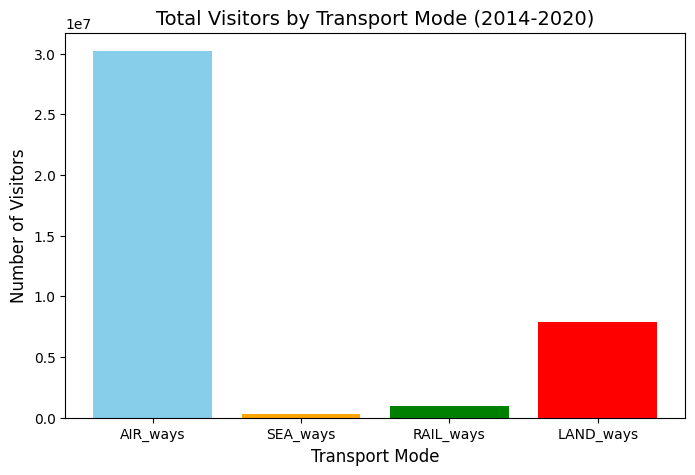

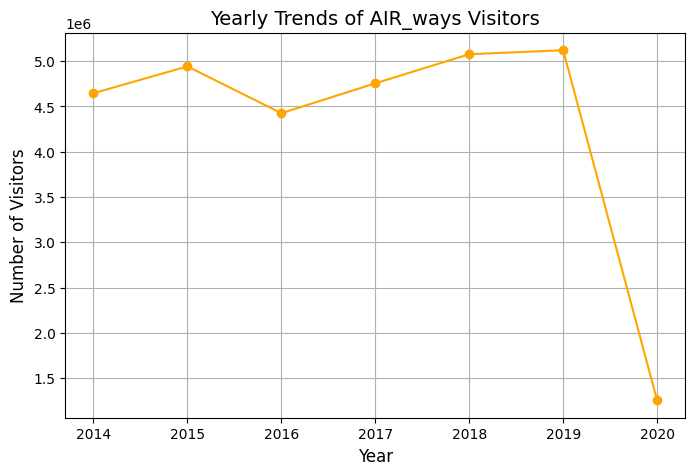

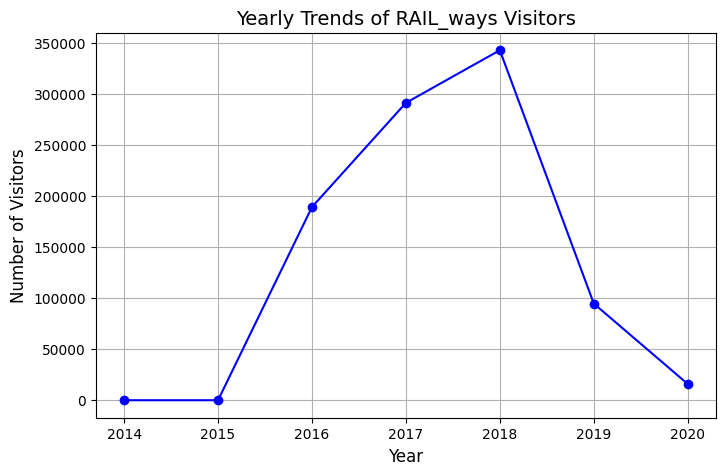

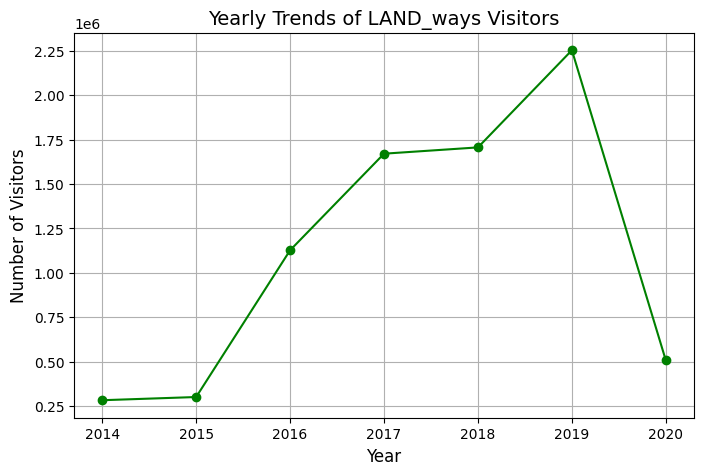

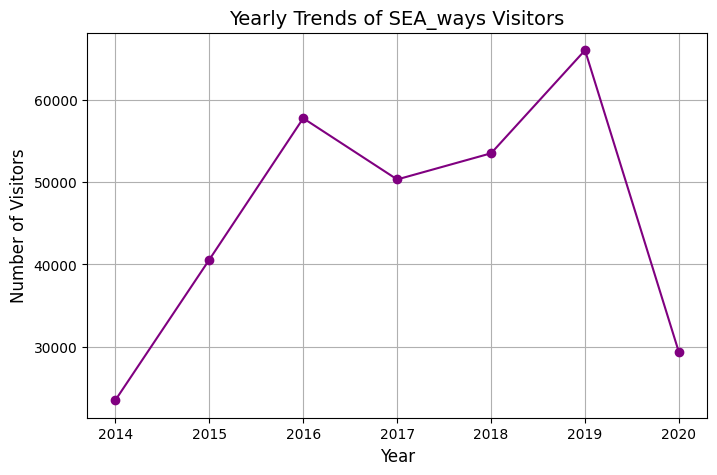

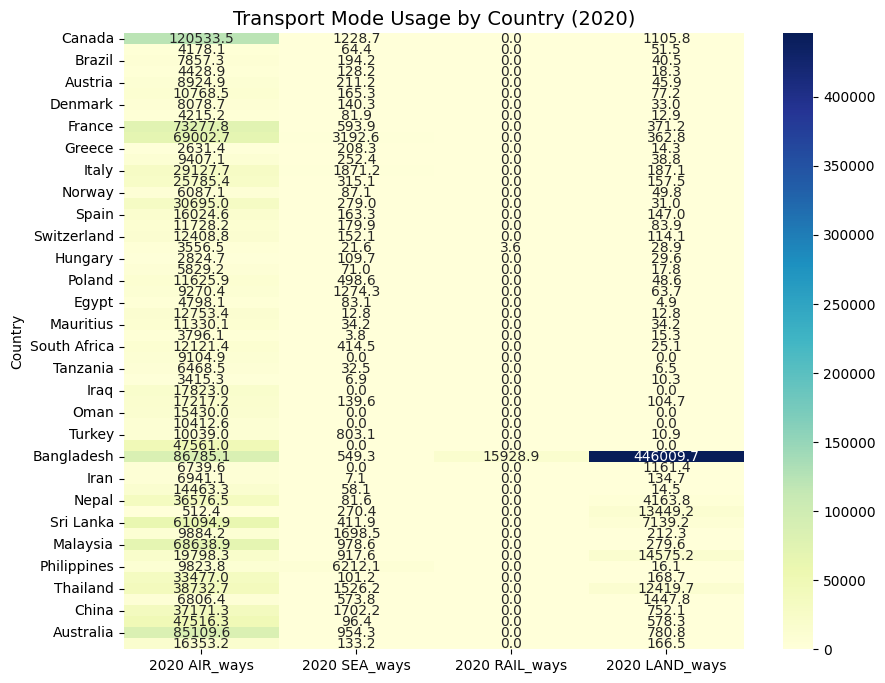

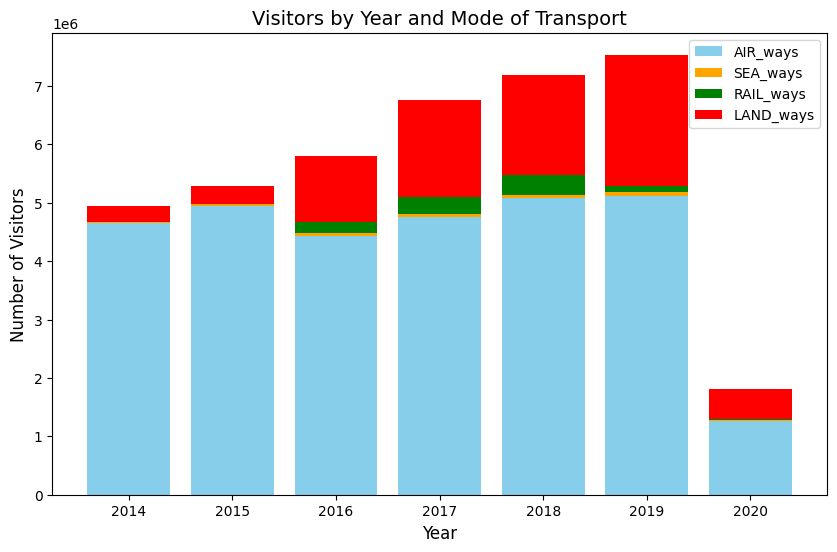

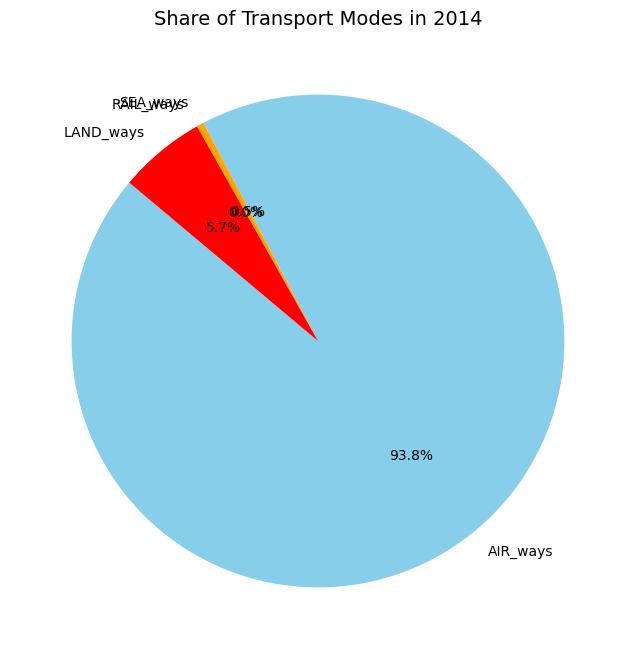

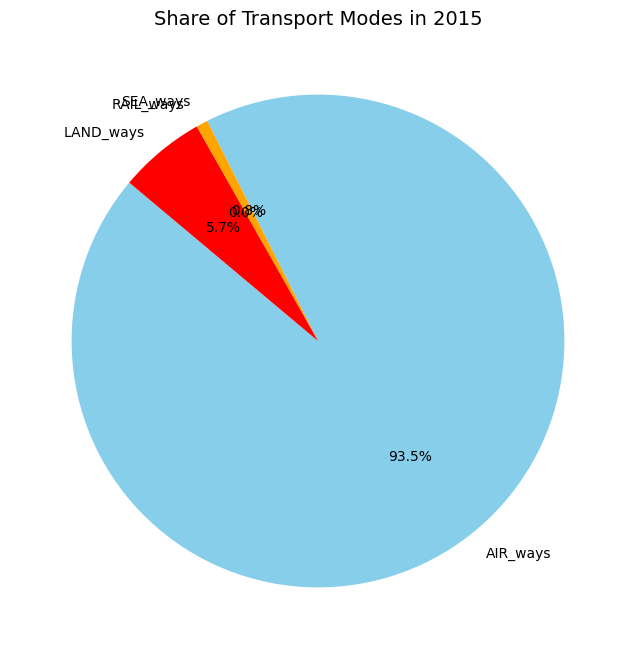

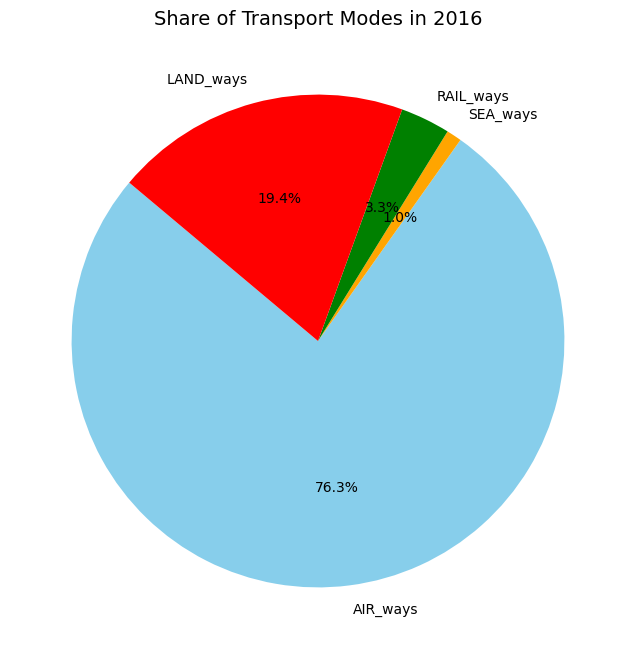

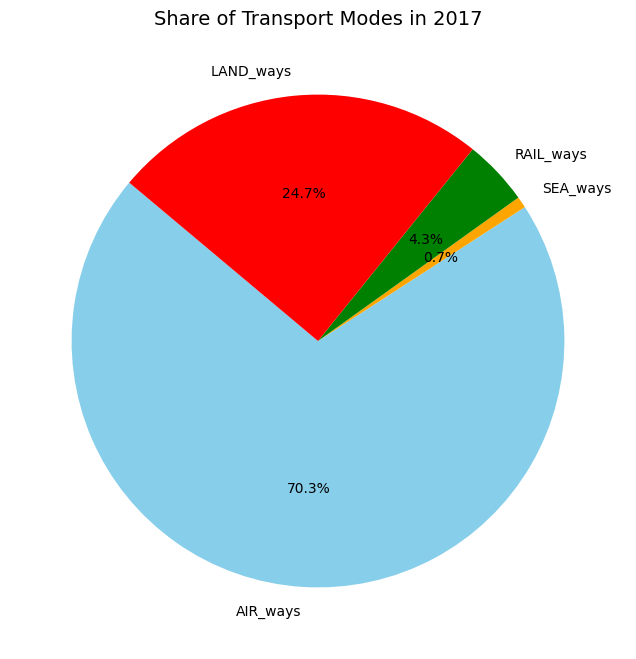

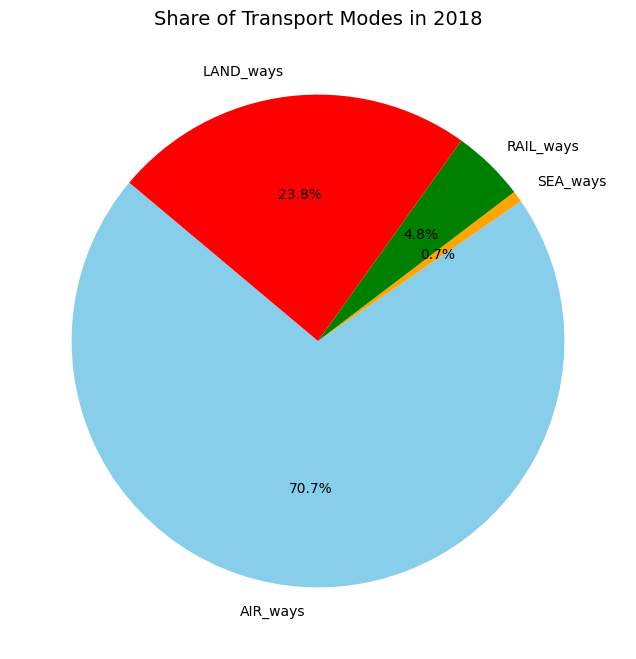

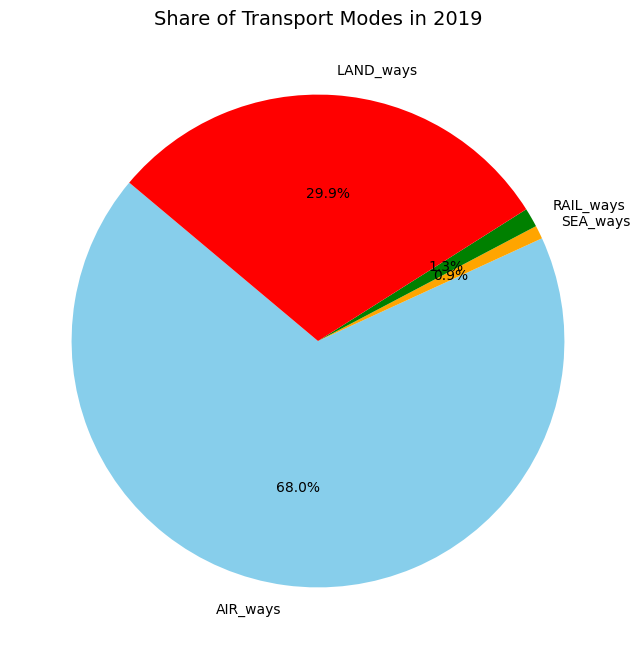

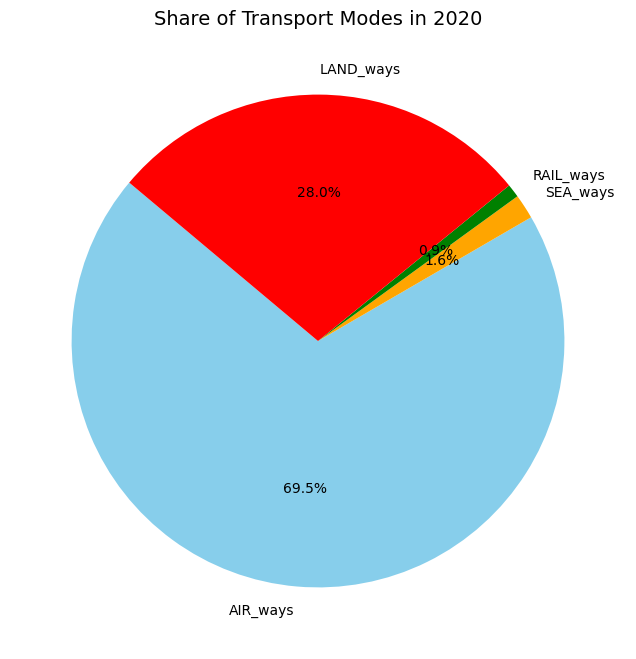

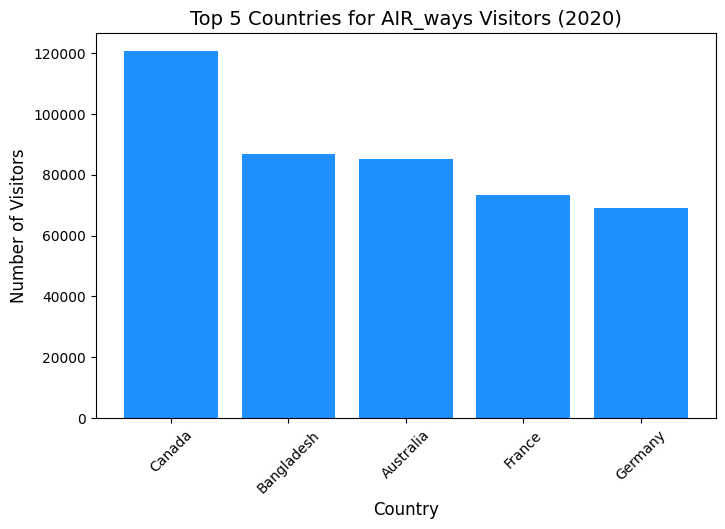

C:\Users\Admin\AppData\Local\Temp\ipykernel_20820\1292381321.py:214: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))


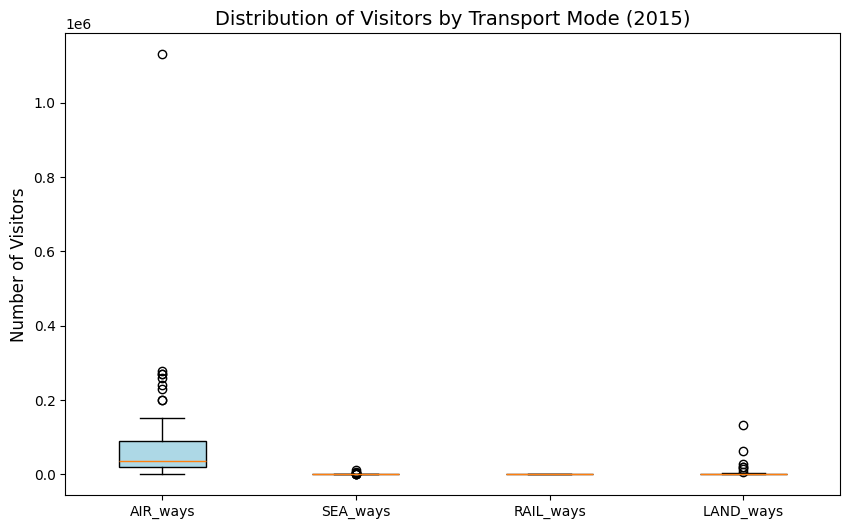

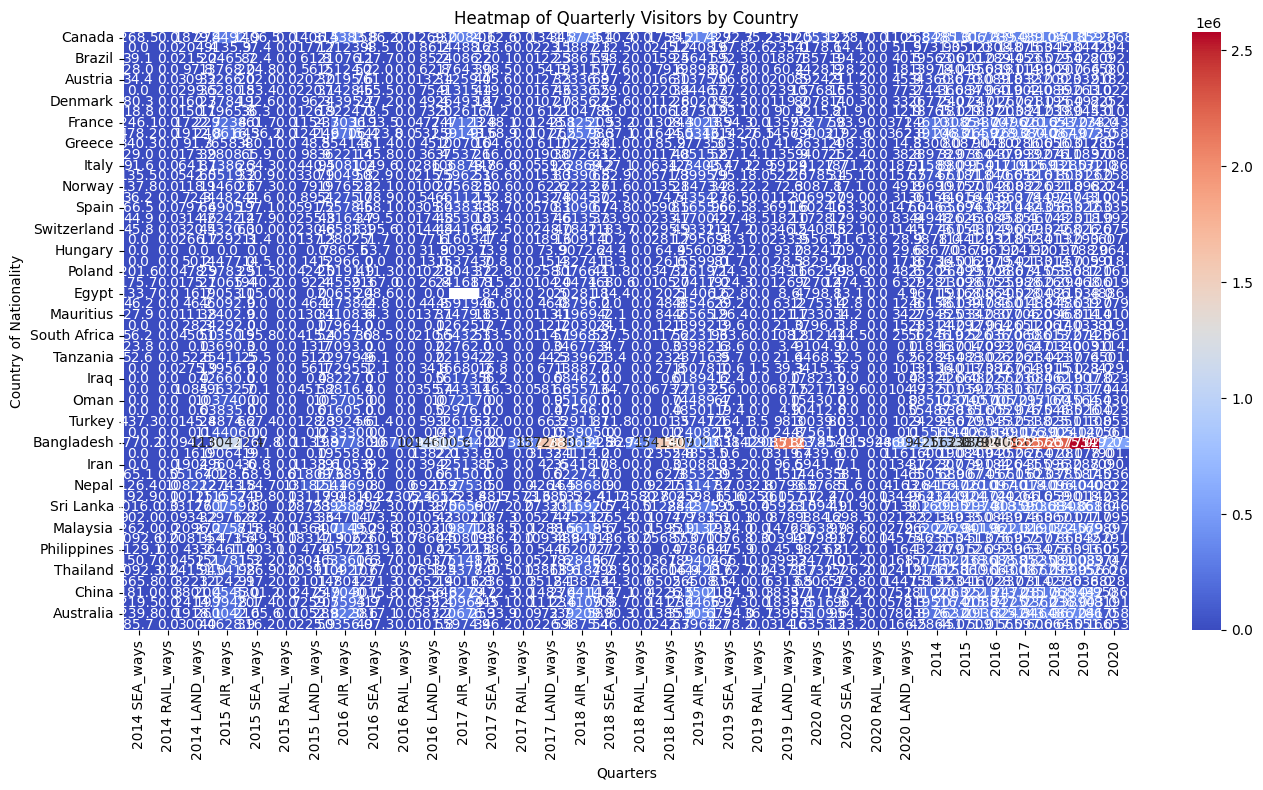

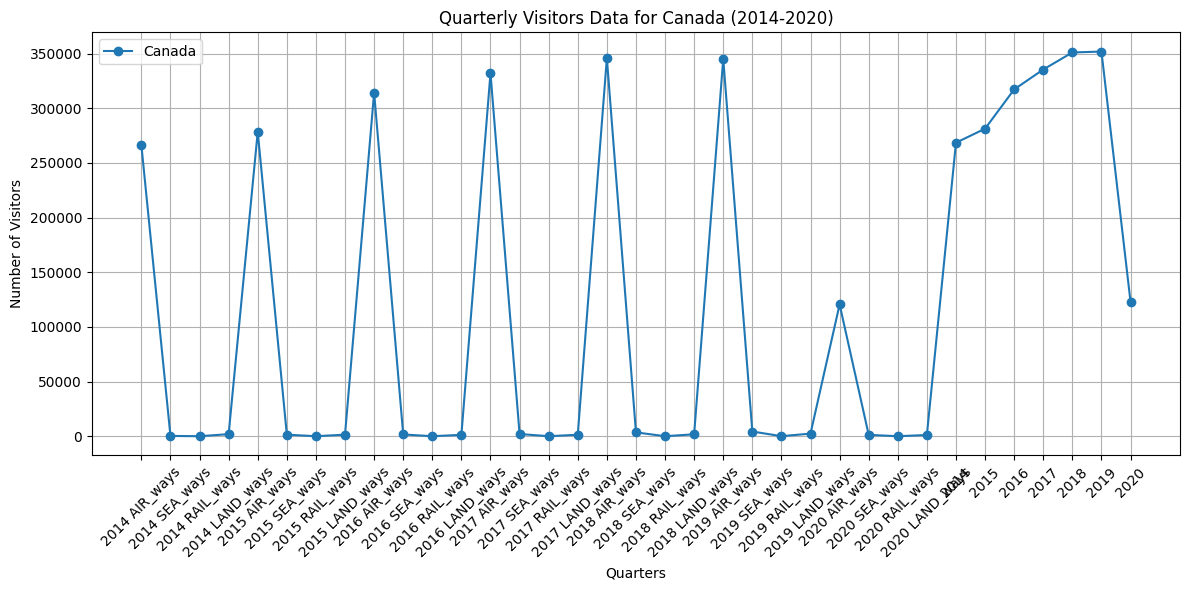

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV files
data = pd.read_csv(r"C:\Users\Admin\Desktop\Python\Python Mpba\Group Project\Travel Master\Cleaned_Country_Wise_Visitors_Ways.csv",encoding='unicode_escape')
# Sum up visitors across all years for each transport mode
modes = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']
totals = [data.filter(like=mode).sum().sum() for mode in modes]

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(modes, totals, color=['skyblue', 'orange', 'green', 'red'])
plt.title('Total Visitors by Transport Mode (2014-2020)', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xlabel('Transport Mode', fontsize=12)
plt.show()
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
air_visitors = [data[f"{year} AIR_ways"].sum() for year in years]

plt.figure(figsize=(8, 5))
plt.plot(years, air_visitors, marker='o', color='orange')
plt.title('Yearly Trends of AIR_ways Visitors', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True)
plt.show()

years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
rail_visitors = [data[f"{year} RAIL_ways"].sum() for year in years]

plt.figure(figsize=(8, 5))
plt.plot(years, rail_visitors, marker='o', color='blue')
plt.title('Yearly Trends of RAIL_ways Visitors', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True)
plt.show()
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
land_visitors = [data[f"{year} LAND_ways"].sum() for year in years]

plt.figure(figsize=(8, 5))
plt.plot(years, land_visitors, marker='o', color='green')
plt.title('Yearly Trends of LAND_ways Visitors', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True)
plt.show()
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
land_visitors = [data[f"{year} SEA_ways"].sum() for year in years]

plt.figure(figsize=(8, 5))
plt.plot(years, land_visitors, marker='o', color='purple')
plt.title('Yearly Trends of SEA_ways Visitors', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True)
plt.show()
data.rename({'ï»¿Country':'Country'}, inplace = True, axis = 1)
# Extract 2020 data
heatmap_data = data[['Country', '2020 AIR_ways', '2020 SEA_ways', '2020 RAIL_ways', '2020 LAND_ways']].set_index('Country')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar=True)
plt.title('Transport Mode Usage by Country (2020)', fontsize=14)
plt.show()

# Aggregate data for each mode by year
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
air_visitors = [data[f"{year} AIR_ways"].sum() for year in years]
sea_visitors = [data[f"{year} SEA_ways"].sum() for year in years]
rail_visitors = [data[f"{year} RAIL_ways"].sum() for year in years]
land_visitors = [data[f"{year} LAND_ways"].sum() for year in years]

# Plot stacked bar chart
bar_width = 0.7
x = np.arange(len(years))

plt.figure(figsize=(10, 6))
plt.bar(x, air_visitors, color='skyblue', label='AIR_ways')
plt.bar(x, sea_visitors, bottom=air_visitors, color='orange', label='SEA_ways')
plt.bar(x, rail_visitors, bottom=np.array(air_visitors)+np.array(sea_visitors), color='green', label='RAIL_ways')
plt.bar(x, land_visitors, bottom=np.array(air_visitors)+np.array(sea_visitors)+np.array(rail_visitors), color='red', label='LAND_ways')

plt.xticks(x, years)
plt.title('Visitors by Year and Mode of Transport', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.show()



# Aggregate 2014 data
transport_2014 = [
    data['2014 AIR_ways'].sum(),
    data['2014 SEA_ways'].sum(),
    data['2014 RAIL_ways'].sum(),
    data['2014 LAND_ways'].sum()
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transport_2014, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Share of Transport Modes in 2014', fontsize=14)
plt.show()
# Aggregate 2015 data
transport_2015 = [
    data['2015 AIR_ways'].sum(),
    data['2015 SEA_ways'].sum(),
    data['2015 RAIL_ways'].sum(),
    data['2015 LAND_ways'].sum()
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transport_2015, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Share of Transport Modes in 2015', fontsize=14)
plt.show()
# Aggregate 2016 data
transport_2016 = [
    data['2016 AIR_ways'].sum(),
    data['2016 SEA_ways'].sum(),
    data['2016 RAIL_ways'].sum(),
    data['2016 LAND_ways'].sum()
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transport_2016, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Share of Transport Modes in 2016', fontsize=14)
plt.show()
# Aggregate 2017 data
transport_2017 = [
    data['2017 AIR_ways'].sum(),
    data['2017 SEA_ways'].sum(),
    data['2017 RAIL_ways'].sum(),
    data['2017 LAND_ways'].sum()
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transport_2017, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Share of Transport Modes in 2017', fontsize=14)
plt.show()
# Aggregate 2018 data
transport_2018 = [
    data['2018 AIR_ways'].sum(),
    data['2018 SEA_ways'].sum(),
    data['2018 RAIL_ways'].sum(),
    data['2018 LAND_ways'].sum()
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transport_2018, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Share of Transport Modes in 2018', fontsize=14)
plt.show()
# Aggregate 2019 data
transport_2019 = [
    data['2019 AIR_ways'].sum(),
    data['2019 SEA_ways'].sum(),
    data['2019 RAIL_ways'].sum(),
    data['2019 LAND_ways'].sum()
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transport_2019, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Share of Transport Modes in 2019', fontsize=14)
plt.show()
# Aggregate 2020 data
transport_2020 = [
    data['2020 AIR_ways'].sum(),
    data['2020 SEA_ways'].sum(),
    data['2020 RAIL_ways'].sum(),
    data['2020 LAND_ways'].sum()
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transport_2020, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Share of Transport Modes in 2020', fontsize=14)
plt.show()
# Get top 5 countries for AIR_ways in 2020
top_air_countries = data.nlargest(5, '2020 AIR_ways')[['Country', '2020 AIR_ways']]

plt.figure(figsize=(8, 5))
plt.bar(top_air_countries['Country'], top_air_countries['2020 AIR_ways'], color='dodgerblue')
plt.title('Top 5 Countries for AIR_ways Visitors (2020)', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Extract data for 2020 by mode
boxplot_data = [
    data['2015 AIR_ways'],
    data['2015 SEA_ways'],
    data['2015 RAIL_ways'],
    data['2015 LAND_ways']
]
labels = ['AIR_ways', 'SEA_ways', 'RAIL_ways', 'LAND_ways']

# Plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Visitors by Transport Mode (2015)', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=12)
plt.show()

# Example visualization: Heatmap of visitors by country and quarter (from df2)
heatmap_data = data.set_index('Country').iloc[:, 1:]  # Exclude country column for heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Quarterly Visitors by Country')
plt.xlabel('Quarters')
plt.ylabel('Country of Nationality')
plt.tight_layout()
plt.show()

# Example visualization: Line plot for Canada over the years (from df2)
quarters = data.columns[1:]  # Get all quarter columns for visualization
canada_data = data.loc[data['Country'] == 'Canada'].iloc[0, 1:]

plt.figure(figsize=(12, 6))
plt.plot(quarters, canada_data, marker='o', label='Canada')
plt.title('Quarterly Visitors Data for Canada (2014-2020)')
plt.xlabel('Quarters')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Visualisations for Top 10 States

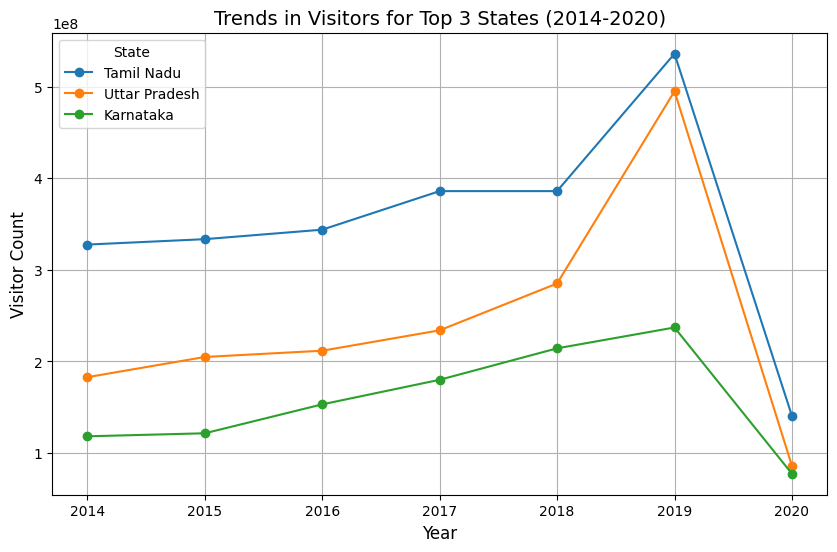

NameError: name 'visitor_counts' is not defined

In [73]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV files
data_new = pd.read_csv(r"C:\Users\Admin\Desktop\Python\Python Mpba\Group Project\Travel Master\Top 10 State Visit.csv",encoding='unicode_escape')
plt.figure(figsize=(10, 6))

# Plot trends for top 3 states
for i in range(1, 4):
    plt.plot(years, data_new[f'top{i}_ftv'], marker='o', label=data_new[f'top{i}_state'][0])

plt.title('Trends in Visitors for Top 3 States (2014-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Visitor Count', fontsize=12)
plt.legend(title='State')
plt.grid(True)
plt.show()

selected_year = 2018
year_index = data_new[data_new['year'] == selected_year].index[0]
visitor_values_year = [data_new.iloc[year_index][visitor] for visitor in visitor_counts]
state_labels = [data_new.iloc[year_index][state] for state in states]

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_labels, visitor_values_year, color='skyblue')
plt.title(f'Top 10 States by Visitor Count ({selected_year})', fontsize=14)
plt.ylabel('Visitor Count', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(visitor_values_year, labels=state_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(f'Visitor Distribution Among Top 10 States ({selected_year})', fontsize=14)
plt.show()



# Prepare heatmap data
heatmap_data = pd.DataFrame(
    {state: data_new[visitor].values for state, visitor in zip(states, visitor_counts)},
    index=years
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Visitors Across Years and States', fontsize=14)
plt.ylabel('State', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

